In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load the dataset
data = pd.read_csv('/content/AAPL.csv')
data

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
1,2020-01-02,72.79601287841797,75.0875015258789,75.1500015258789,73.79750061035156,74.05999755859375,135480400
2,2020-01-03,72.08828735351562,74.35749816894531,75.1449966430664,74.125,74.2874984741211,146322800
3,2020-01-06,72.66271209716797,74.94999694824219,74.98999786376953,73.1875,73.44750213623047,118387200
4,2020-01-07,72.32096099853516,74.59750366210938,75.2249984741211,74.37000274658203,74.95999908447266,108872000
...,...,...,...,...,...,...,...
1233,2024-11-22,229.8699951171875,229.8699951171875,230.72000122070312,228.05999755859375,228.05999755859375,38168300
1234,2024-11-25,232.8699951171875,232.8699951171875,233.25,229.74000549316406,231.4600067138672,90152800
1235,2024-11-26,235.05999755859375,235.05999755859375,235.57000732421875,233.3300018310547,233.3300018310547,45986200
1236,2024-11-27,234.92999267578125,234.92999267578125,235.69000244140625,233.80999755859375,234.47000122070312,33498400


In [ ]:
# Inspect the dataset
data.head()


,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
1,2020-01-02,72.79601287841797,75.0875015258789,75.1500015258789,73.79750061035156,74.05999755859375,135480400
2,2020-01-03,72.08828735351562,74.35749816894531,75.1449966430664,74.125,74.2874984741211,146322800
3,2020-01-06,72.66271209716797,74.94999694824219,74.98999786376953,73.1875,73.44750213623047,118387200
4,2020-01-07,72.32096099853516,74.59750366210938,75.2249984741211,74.37000274658203,74.95999908447266,108872000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1238 non-null   object
 1   Adj Close  1238 non-null   object
 2   Close      1238 non-null   object
 3   High       1238 non-null   object
 4   Low        1238 non-null   object
 5   Open       1238 non-null   object
 6   Volume     1238 non-null   object
dtypes: object(7)
memory usage: 67.8+ KB


In [ ]:
data.shape

(1238, 7)

In [5]:
# Clean and preprocess data
# Remove redundant header row and reset the dataframe
cleaned_data = data.iloc[1:].reset_index(drop=True)

# Rename columns to appropriate names
cleaned_data.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

In [6]:

# Convert columns to correct data types
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'], errors='coerce')
numeric_columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
for col in numeric_columns:
    cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors='coerce')

In [ ]:
# Check the cleaned dataset
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1237 non-null   datetime64[ns]
 1   Adj Close  1237 non-null   float64       
 2   Close      1237 non-null   float64       
 3   High       1237 non-null   float64       
 4   Low        1237 non-null   float64       
 5   Open       1237 non-null   float64       
 6   Volume     1237 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.8 KB


In [7]:
cleaned_data

,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02,72.796013,75.087502,75.150002,73.797501,74.059998,135480400
1,2020-01-03,72.088287,74.357498,75.144997,74.125000,74.287498,146322800
2,2020-01-06,72.662712,74.949997,74.989998,73.187500,73.447502,118387200
3,2020-01-07,72.320961,74.597504,75.224998,74.370003,74.959999,108872000
4,2020-01-08,73.484360,75.797501,76.110001,74.290001,74.290001,132079200
...,...,...,...,...,...,...,...
1232,2024-11-22,229.869995,229.869995,230.720001,228.059998,228.059998,38168300
1233,2024-11-25,232.869995,232.869995,233.250000,229.740005,231.460007,90152800
1234,2024-11-26,235.059998,235.059998,235.570007,233.330002,233.330002,45986200
1235,2024-11-27,234.929993,234.929993,235.690002,233.809998,234.470001,33498400


In [ ]:
# Display the earliest and latest dates
date_from = cleaned_data['Date'].min()
date_to = cleaned_data['Date'].max()
print(" data is from", date_from, "to", date_to)


 data is from 2020-01-02 00:00:00 to 2024-11-29 00:00:00


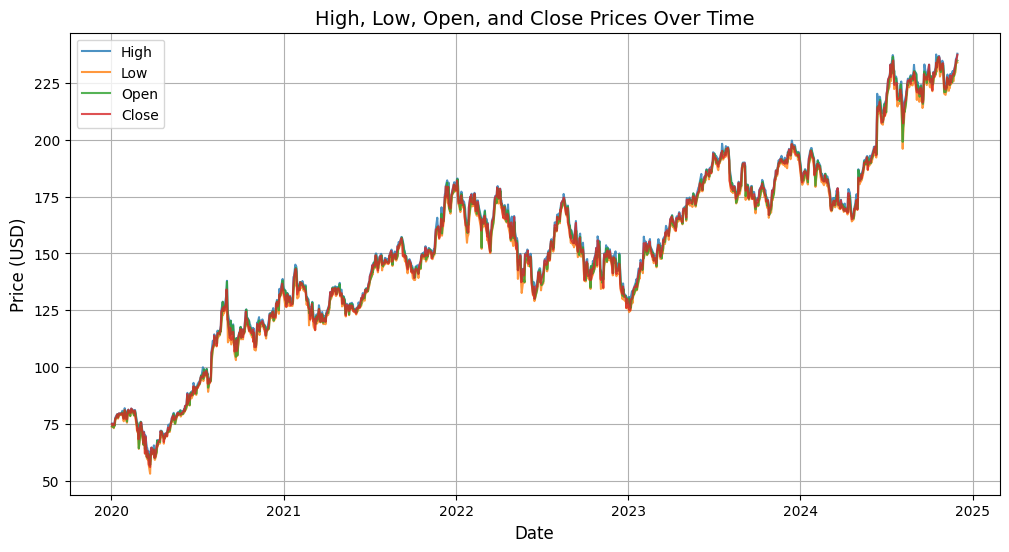

In [ ]:

# High, Low, Open, and Close prices over time

plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['Date'], cleaned_data['High'], label='High', alpha=0.8)
plt.plot(cleaned_data['Date'], cleaned_data['Low'], label='Low', alpha=0.8)
plt.plot(cleaned_data['Date'], cleaned_data['Open'], label='Open', alpha=0.8)
plt.plot(cleaned_data['Date'], cleaned_data['Close'], label='Close', alpha=0.8)
plt.title('High, Low, Open, and Close Prices Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid()
plt.show()

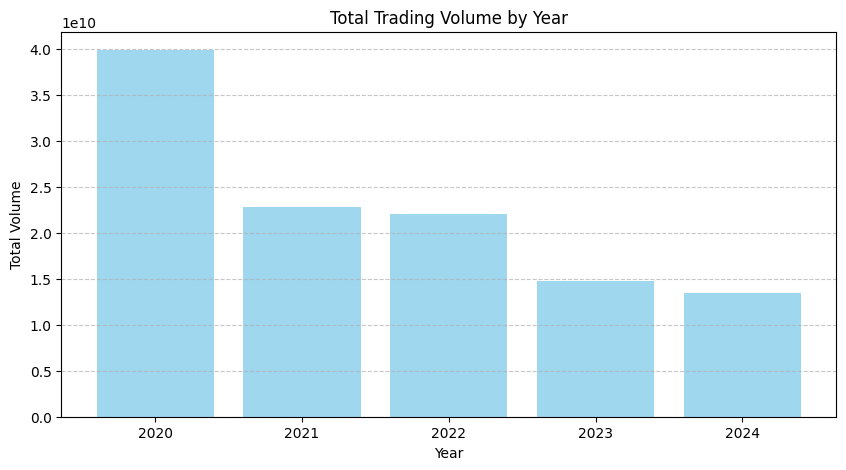

In [8]:
# Trading volume for each year
cleaned_data['Year'] = cleaned_data['Date'].dt.year
volume_by_year = cleaned_data.groupby('Year')['Volume'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.bar(volume_by_year['Year'], volume_by_year['Volume'], color='skyblue', alpha=0.8)
plt.title('Total Trading Volume by Year')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


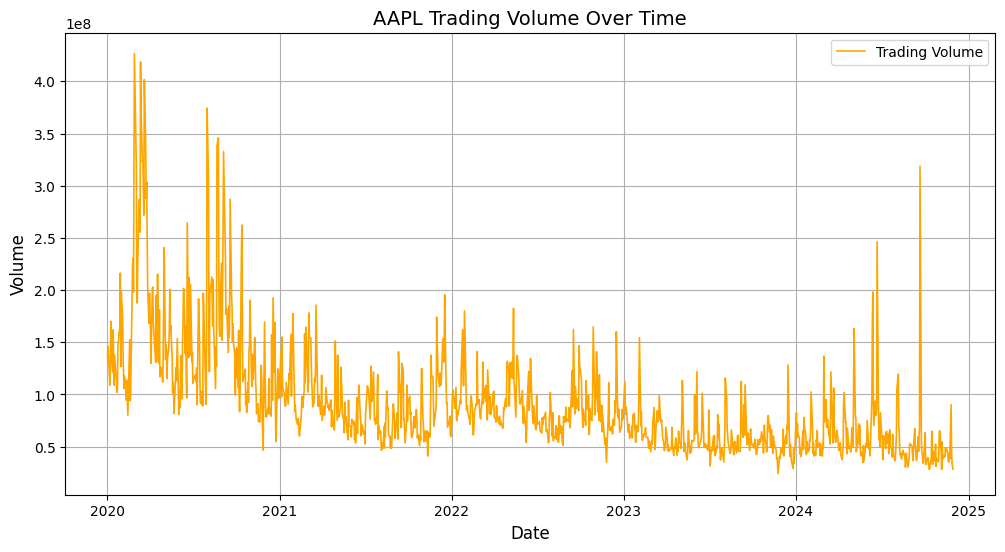

In [9]:
# Plot trading volume trends
plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['Date'], cleaned_data['Volume'], label='Trading Volume', color='orange', linewidth=1.2)
plt.title('AAPL Trading Volume Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend()
plt.grid()
plt.show()


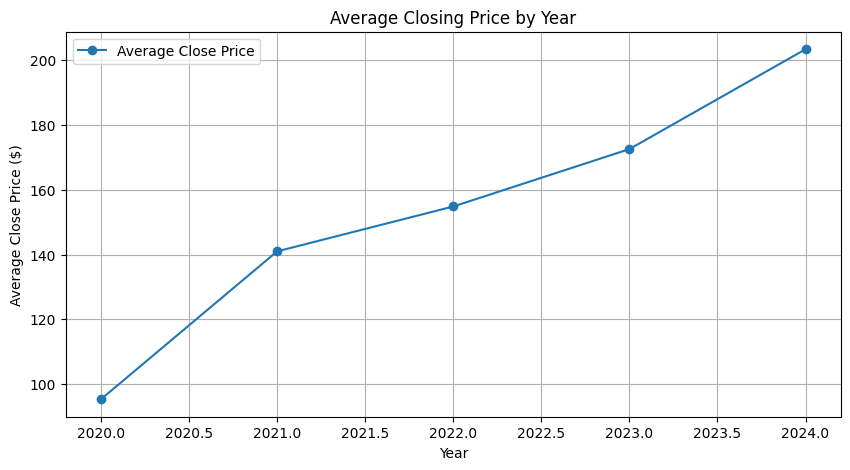

In [10]:
# Average closing price by year
avg_close_by_year = cleaned_data.groupby('Year')['Close'].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(avg_close_by_year['Year'], avg_close_by_year['Close'], marker='o', label='Average Close Price')
plt.title('Average Closing Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Close Price ($)')
plt.grid(True)
plt.legend()
plt.show()



In [13]:
# Volume outliers using the IQR method
Q1 = cleaned_data['Volume'].quantile(0.25)
Q3 = cleaned_data['Volume'].quantile(0.75)
IQR = Q3 - Q1

# Define high-volume thresholds
# high_volume_threshold = Q3 + 1.5 * IQR
high_volume_threshold_higher = Q3 + 2.0 * IQR

# Filter high-volume outliers
#high_volume_outliers = cleaned_data[cleaned_data['Volume'] > high_volume_threshold][['Date', 'Volume']]
high_volume_outliers_higher = cleaned_data[cleaned_data['Volume'] > high_volume_threshold_higher][['Date', 'Volume']]



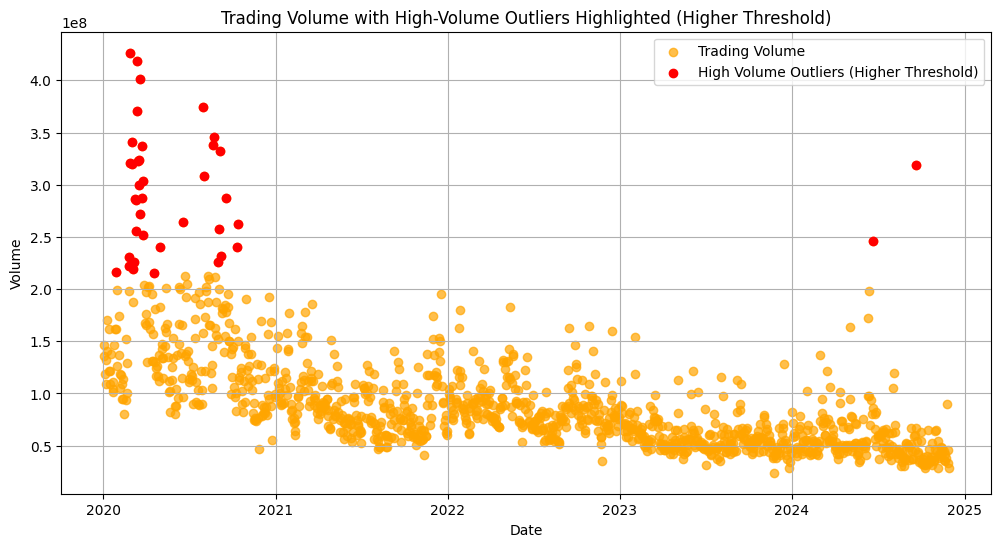

In [14]:
# Visualize trading volume with outliers highlighted
plt.figure(figsize=(12, 6))
plt.scatter(cleaned_data['Date'], cleaned_data['Volume'], label='Trading Volume', color='orange', alpha=0.7)
plt.scatter(high_volume_outliers_higher['Date'], high_volume_outliers_higher['Volume'], color='red', label='High Volume Outliers (Higher Threshold)', zorder=5)
plt.title('Trading Volume with High-Volume Outliers Highlighted (Higher Threshold)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()



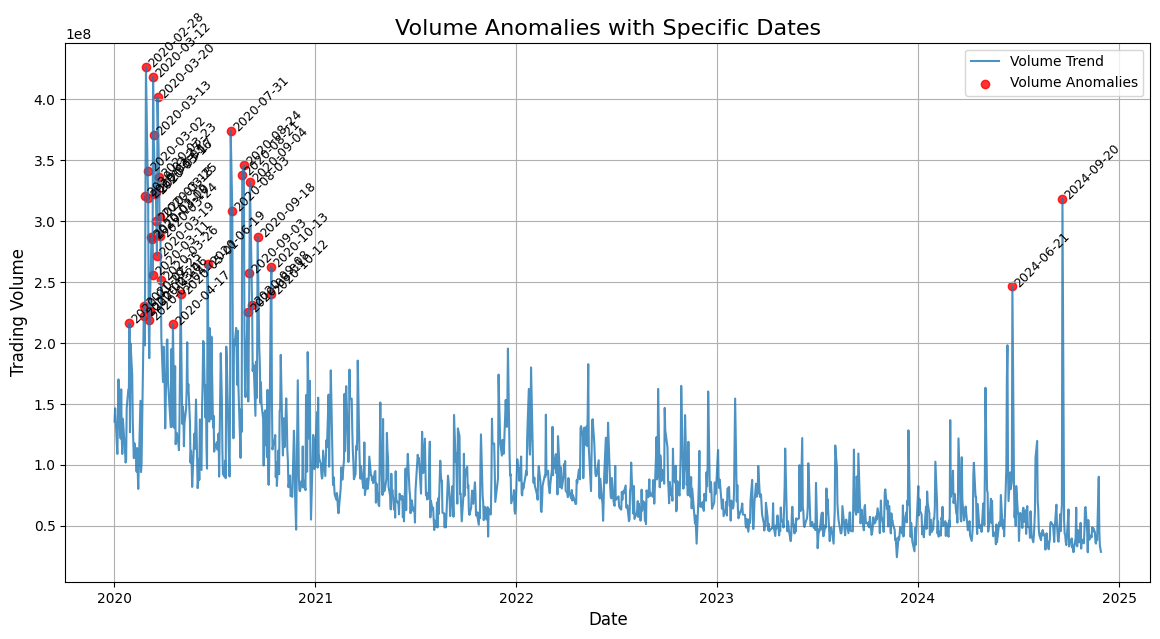

In [20]:

# Volume anomalies with dates
plt.figure(figsize=(14, 7))
plt.plot(cleaned_data['Date'], cleaned_data['Volume'], label='Volume Trend', alpha=0.8)
plt.scatter(high_volume_outliers_higher['Date'], high_volume_outliers_higher['Volume'], color='red', label='Volume Anomalies', alpha=0.8)
for i in range(len(high_volume_outliers_higher)):
    plt.text(high_volume_outliers_higher['Date'].iloc[i], high_volume_outliers_higher['Volume'].iloc[i],
             high_volume_outliers_higher['Date'].iloc[i].strftime('%Y-%m-%d'), fontsize=9, rotation=45)
plt.title('Volume Anomalies with Specific Dates', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Trading Volume', fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [15]:
# Analyze price movements during outlier periods
outlier_analysis = cleaned_data[cleaned_data['Date'].isin(high_volume_outliers_higher['Date'])]
price_movement = outlier_analysis[['Date', 'Open', 'High', 'Low', 'Close']]
price_movement



,Date,Open,High,Low,Close
18,2020-01-29,81.112503,81.962502,80.345001,81.084999
35,2020-02-24,74.315002,76.044998,72.307503,74.544998
36,2020-02-25,75.237503,75.632500,71.532501,72.019997
38,2020-02-27,70.275002,71.500000,68.239998,68.379997
39,2020-02-28,64.315002,69.602501,64.092499,68.339996
40,2020-03-02,70.570000,75.360001,69.430000,74.702499
41,2020-03-03,75.917503,76.000000,71.449997,72.330002
42,2020-03-04,74.110001,75.849998,73.282501,75.684998
44,2020-03-06,70.500000,72.705002,70.307503,72.257500
45,2020-03-09,65.937500,69.522499,65.750000,66.542503


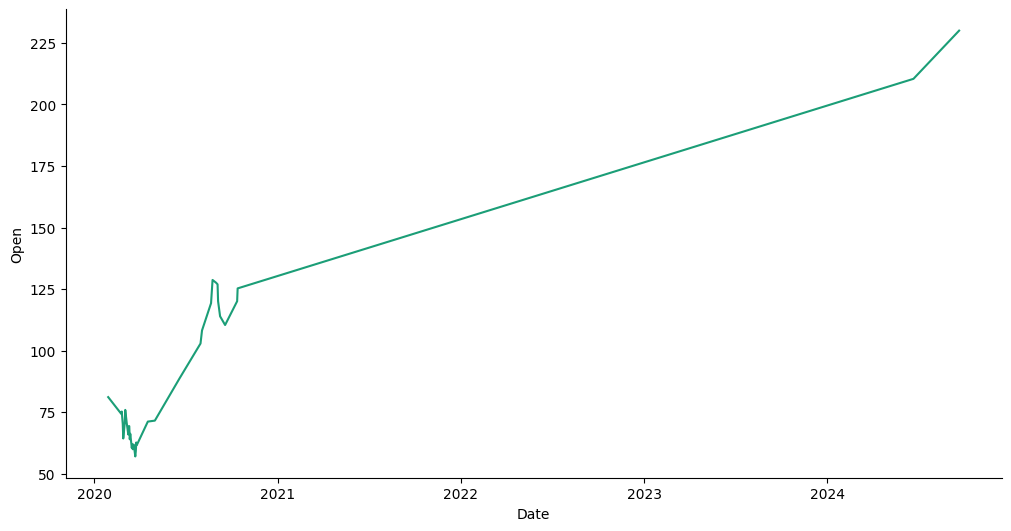

In [16]:

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = price_movement.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

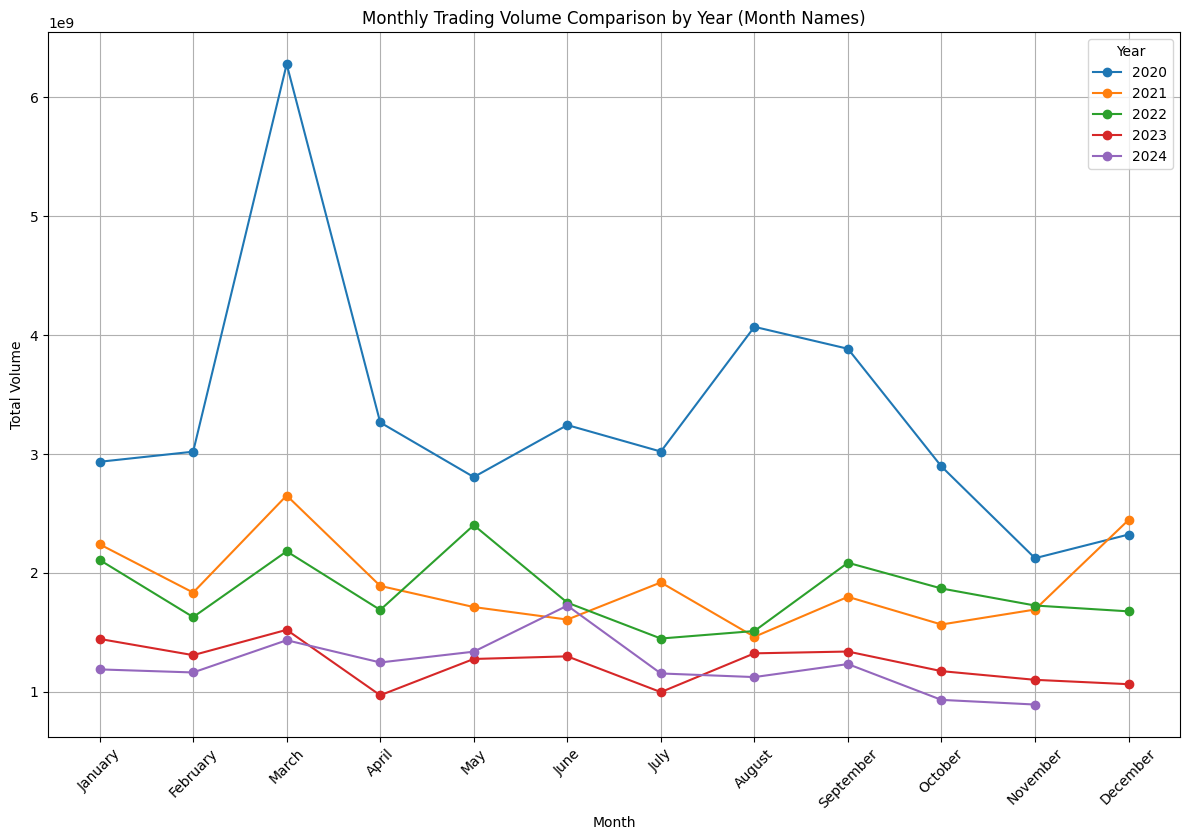

In [17]:
# Trading volume for each month within each year
cleaned_data['Month'] = cleaned_data['Date'].dt.month
volume_by_month_year = cleaned_data.groupby(['Year', 'Month'])['Volume'].sum().reset_index()
volume_by_month_year['Month'] = volume_by_month_year['Month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))
plt.figure(figsize=(12, 8))
for year in volume_by_month_year['Year'].unique():
    monthly_data = volume_by_month_year[volume_by_month_year['Year'] == year]
    plt.plot(monthly_data['Month'], monthly_data['Volume'], label=f'{year}', marker='o')
plt.title('Monthly Trading Volume Comparison by Year (Month Names)')
plt.xlabel('Month')
plt.ylabel('Total Volume')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

<Figure size 1400x800 with 0 Axes>

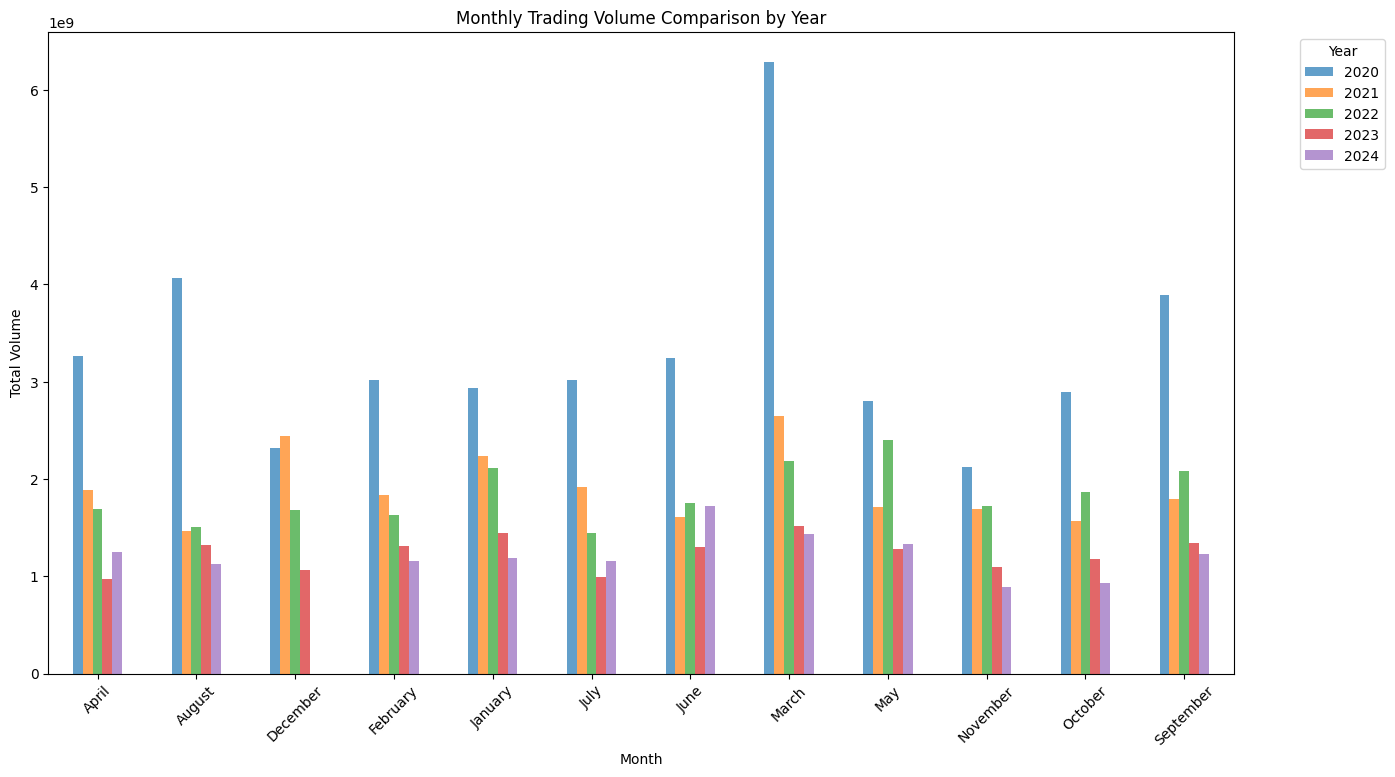

In [18]:
# Trading volume for each month within each year
cleaned_data['Month'] = cleaned_data['Date'].dt.month
volume_by_month_year = cleaned_data.groupby(['Year', 'Month'])['Volume'].sum().reset_index()
volume_by_month_year['Month'] = volume_by_month_year['Month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))
monthly_proportion = volume_by_month_year.pivot(index='Month', columns='Year', values='Volume')

# Plot the proportions
plt.figure(figsize=(14, 8))
monthly_proportion.plot(kind='bar', figsize=(14, 8), alpha=0.7)
plt.title('Monthly Trading Volume Comparison by Year')
plt.ylabel('Total Volume')
plt.xlabel('Month')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


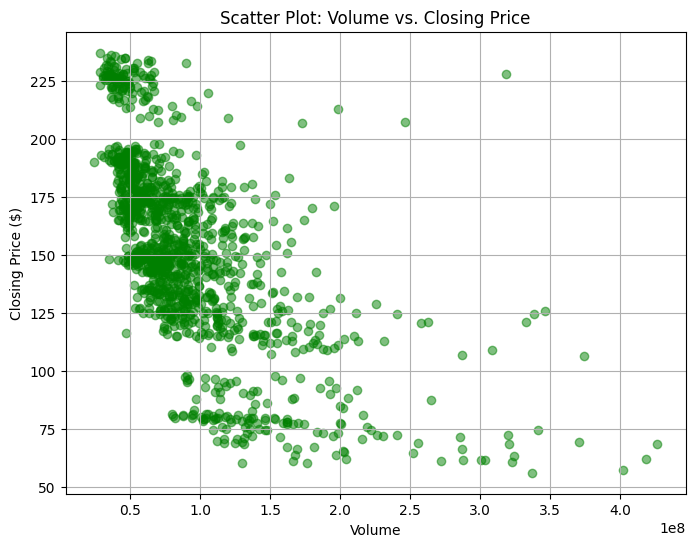

In [19]:
# Comparison 3: Volume and closing price correlation
cleaned_data[['Volume', 'Close']].corr()
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_data['Volume'], cleaned_data['Close'], alpha=0.5, color='green')
plt.title('Scatter Plot: Volume vs. Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price ($)')
plt.grid(True)
plt.show()
